<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/TCGA_duomenu_apdorojimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [99]:
url = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/counts_combined.csv'
df = pd.read_csv(url)
df.head()

,miRNA_ID,read_count_TCGA-2G-AAG5-01A-11R-A439-13,read_count_TCGA-2G-AAG6-01A-11R-A439-13,read_count_TCGA-2G-AAGY-05A-11R-A439-13,read_count_TCGA-2G-AAGY-01A-11R-A439-13,read_count_TCGA-2G-AAGV-01A-11R-A439-13,read_count_TCGA-2G-AAGX-01A-11R-A439-13,read_count_TCGA-2G-AAFE-01A-11R-A439-13,read_count_TCGA-2G-AAGA-01A-11R-A439-13,read_count_TCGA-ZM-AA05-01A-12R-A43A-13,...,read_count_TCGA-WZ-A7V3-01A-11R-A43A-13,read_count_TCGA-2G-AAH3-01A-11R-A439-13,read_count_TCGA-4K-AA1I-01A-11R-A439-13,read_count_TCGA-S6-A8JX-01A-11R-A439-13,read_count_TCGA-SO-A8JP-01A-11R-A43A-13,read_count_TCGA-2G-AAFZ-01A-11R-A439-13,read_count_TCGA-XE-AANR-01A-11R-A43A-13,read_count_TCGA-XE-AAOJ-01A-12R-A43A-13,read_count_TCGA-2G-AAHG-01A-11R-A439-13,read_count_TCGA-2G-AAGP-01A-11R-A439-13
0,hsa-let-7a-1,98880,199771,14494,39072,127522,151508,40018,36309,62307,...,7584,30863,21545,7863,19993,60411,35383,33557,10810,70818
1,hsa-let-7a-2,98726,199757,14791,38979,126858,152317,39735,36097,61796,...,7509,30875,21129,8188,20023,60324,35142,33459,10725,70561
2,hsa-let-7a-3,99331,202322,14662,39183,128460,152572,40299,36326,62537,...,7638,30853,21440,8142,20107,60271,35164,33762,10830,71303
3,hsa-let-7b,144954,257771,15110,41688,108708,185933,41846,44154,49137,...,7979,38504,24463,17472,30699,57144,77662,34885,15229,95517
4,hsa-let-7c,107229,326967,2614,59663,479042,366449,6560,17224,5367,...,283,6766,4421,3387,4990,63271,29257,62214,3600,52257


In [3]:
gene_names = df["miRNA_ID"].to_numpy()
df_trimmed = df.drop(df.columns[0], axis=1)

In [4]:
full_data = df_trimmed.to_numpy(dtype = np.int32)

In [5]:
print(full_data)
print(np.shape(full_data))

[[ 98880 199771  14494 ...  33557  10810  70818]
 [ 98726 199757  14791 ...  33459  10725  70561]
 [ 99331 202322  14662 ...  33762  10830  71303]
 ...
 [  1023   2244     63 ...   1010     50    552]
 [ 26826  88977    781 ...  15641   2606  13387]
 [396321 632648  41693 ... 719074  34287 254921]]
(1881, 139)


In [6]:
filtered_data = full_data[~np.all(full_data == 0, axis=1)]
filtered_gene_names = gene_names[~np.all(full_data == 0, axis=1)]

In [66]:
# Papildomas filtravimas, jei reikia
#Calculate the percentage of values less than 100 for each row
min_counts = 100
max_below_min_counts = 0.5
percent_less_than_100 = np.sum(full_data < min_counts, axis=1) / full_data.shape[1]

# Keep only rows where values less than min_counts occur max_below_min_counts or less of the time
further_filtered_data = full_data[percent_less_than_100 <= max_below_min_counts]
further_filtered_gene_names = gene_names[percent_less_than_100 <= max_below_min_counts]

# Display the filtered array
print(np.shape(further_filtered_data))

(266, 139)
[[ 98880 199771  14494 ...  33557  10810  70818]
 [ 98726 199757  14791 ...  33459  10725  70561]
 [ 99331 202322  14662 ...  33762  10830  71303]
 ...
 [  1023   2244     63 ...   1010     50    552]
 [ 26826  88977    781 ...  15641   2606  13387]
 [396321 632648  41693 ... 719074  34287 254921]]


In [ ]:
print(filtered_data[1000,:])

[    5   107   255     5     3    80   295  9376   127  5285  4120  2956
 15488    44  4979   288  1253   300   132   278   637     9    75  8893
   791   722 11311  2748  8972    12   335   149    45 16334   306  1095
   522     7   313   588     7  1145  1553   522   639  1025  1095  1181
   106   271 10139   154 16525   674    23    23  7096  6115   938   112
   528  7338   551   108   287   282    11  6126   324   214  2152     7
    40  6000   373   683   218  3970  1575   287   634  3442  6511   567
   311  8546  5989   446   807  6699   985  1408 13965   792  4822  1021
   303  1976  1188 18066   672  8281  6236   250  3101  9709  1103   219
  8965   246   629   459   371   117 22680  8868     8   719  7778    26
   326  8607   466    47  1054     7   792   368  2122   712   526   377
   313   403   245   976    10   440    72]


In [68]:
#susicentruojam duomenis, jei reikia
X = further_filtered_data.T
gene_ids = further_filtered_gene_names
#X = X - np.mean(X, axis = 0)
print(np.shape(X))
print(np.shape(gene_ids))

(139, 266)
(266,)


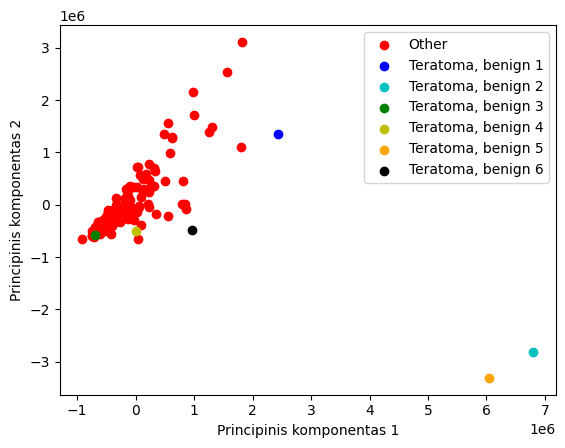

In [70]:
#duomenu "suplokstinimas"/vizualizacija naudojantis principine komponentu analize (PCA)
pca = PCA(n_components=15)
pca_data = pca.fit_transform(X)

comp_1 = 0
comp_2 = 1

plt.scatter(pca_data[6:139, comp_1], pca_data[6:139, comp_2], c = 'r', label = 'Other')
plt.scatter(pca_data[0, comp_1], pca_data[0, comp_2], c = 'b', label = 'Teratoma, benign 1')
plt.scatter(pca_data[1, comp_1], pca_data[1, comp_2], c = 'c', label = 'Teratoma, benign 2')
plt.scatter(pca_data[2, comp_1], pca_data[2, comp_2], c = 'g', label = 'Teratoma, benign 3')
plt.scatter(pca_data[3, comp_1], pca_data[3, comp_2], c = 'y', label = 'Teratoma, benign 4')
plt.scatter(pca_data[4, comp_1], pca_data[4, comp_2], c = 'orange', label = 'Teratoma, benign 5')
plt.scatter(pca_data[5, comp_1], pca_data[5, comp_2], c = 'k', label = 'Teratoma, benign 6')

plt.xlabel('Principinis komponentas ' +str(comp_1 + 1))
plt.ylabel('Principinis komponentas ' +str(comp_2 + 1))
plt.legend()
plt.show()

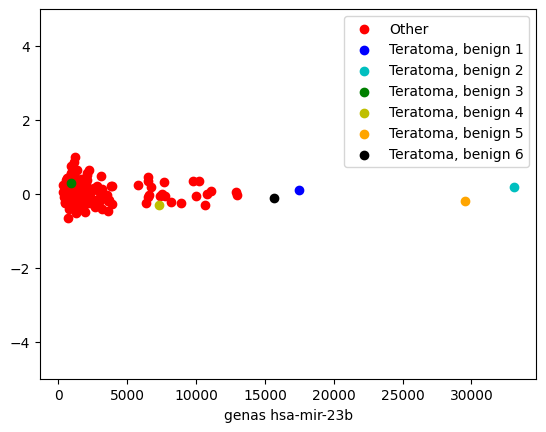

In [98]:
#galime patikrinti kaip pavieniu miRNR raiska skiriasi tarp piktybiniu ir nepiktybiniu naviku

try:
  #i=np.where(gene_ids == 'hsa-mir-520f')[0][0]
  i = 109


  plt.scatter(X[6:139, i], np.random.normal(scale=0.3, size = len(X[6:139, 0])), c = 'r', label = 'Other')
  plt.scatter(X[0, i], 0.1, c = 'b', label = 'Teratoma, benign 1')
  plt.scatter(X[1, i], 0.2, c = 'c', label = 'Teratoma, benign 2')
  plt.scatter(X[2, i], 0.3, c = 'g', label = 'Teratoma, benign 3')
  plt.scatter(X[3, i], -0.3, c = 'y', label = 'Teratoma, benign 4')
  plt.scatter(X[4, i], -0.2, c = 'orange', label = 'Teratoma, benign 5')
  plt.scatter(X[5, i], -0.1, c = 'k', label = 'Teratoma, benign 6')
  plt.xlabel('genas ' + str(gene_ids[i]))
  plt.ylim(-5, 5)
  plt.legend()
  plt.show()
except:
    print('Sitas genas isfiltruotas - reiktu pakeisti X matrica')


In [95]:
#pabandom surasti miRNR, kuriu raiska labiausiai skiriasi

scaler = StandardScaler()
transformed_X = scaler.fit_transform(X)

arr = transformed_X #gali buti X arba transformed_X (antru atveju genu raisku dispersijos yra suvienodintos - t.y. vienodai svarbos duodam genams, kuriu raiskos gali buti nuo 0 iki 1000, ar nuo 0 iki 100000 ar nuo 0 iki 1000000)
Ter = arr[0:6]
teratoma_benign_means = np.mean(Ter, axis = 0)
all_means = np.mean(arr, axis = 0)

arr = teratoma_benign_means - all_means

sorted_indices = np.argsort(-np.abs(arr))
sorted_array = arr[sorted_indices]

print("Genai, kuriu vidurkiai tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi:", sorted_indices[:30])


Genai, kuriu vidurkiai tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi: [118  46  44 109  54 264  11 117   4  27  26 130  77   2   0   1 230   6
   3 134 228 263  10 232 156  82  86 155  85  84]


In [96]:
arr = transformed_X #gali buti ir nenormalizuoti/netransformuoti duomenys
Ter = arr[0:6]
teratoma_benign_vars = np.var(Ter, axis = 0)
all_vars = np.var(arr, axis = 0)


arr_2 = teratoma_benign_vars - all_vars

sorted_indices_2 = np.argsort(-np.abs(arr_2))
sorted_array_2 = arr_2[sorted_indices_2]

print("Genai, kuriu dispersija tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi:", sorted_indices_2[0:30])

Genai, kuriu dispersija tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi: [ 44  46  70 243 130 264   4 118 109  54 117  21 156   3 230 155  77 134
 120 103  39   2   0   1 104  11 131 263   7   8]
